## LABORATORY 04: MACHINE LEARNING II - CLASSIFICATION PROBLEM

This intermediate level data set was extracted from the census bureau database. There are 48842 instances of data set, mix of continuous and discrete (train=32561, test=16281).

The data set has 15 attribute which include age, sex, education level and other relevant details of a person. The data set will help to improve your skills in Exploratory Data Analysis, Data Wrangling, Data Visualization and Classification Models.

- age: the age of an individual.
- workclass: The type of work or employment of an individual. It can have the following categories:
    - Private: Working in the private sector.
    - Self-emp-not-inc: Self-employed individuals who are not incorporated.
    - Self-emp-inc: Self-employed individuals who are incorporated.
    - Federal-gov: Working for the federal government.
    - Local-gov: Working for the local government.
    - State-gov: Working for the state government.
    - Without-pay: Not working and without pay.
    - Never-worked: Never worked before.
- Final Weight: The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. 

- education: The highest level of education completed.
- education-num: The number of years of education completed.
- marital-status: The marital status.
- occupation: Type of work performed by an individual.
- relationship: The relationship status.
- race: The race of an individual.
- sex: The gender of an individual.
- capital-gain: The amount of capital gain (financial profit).
- capital-loss: The amount of capital loss an individual has incurred.
- hours-per-week: The number of hours works per week.
- native-country: The country of origin or the native country.
- income: The income level of an individual and serves as the target variable. It indicates whether the income is greater than $50,000 or less than or equal to $50,000, denoted as (>50K, <=50K).

#### 1. Load the dataset

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sbn
import scripts

In [2]:
# load train and test set
dataset = pd.read_csv("dataset/train.csv", sep = ",", low_memory = False)
test_set = pd.read_csv("dataset/test.csv", sep = ",", low_memory = False)
dataset.head(10)

,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [3]:
# dimensions of dataset
print("#Train-samples = ", dataset.shape[0])
print("#Train-features = ", dataset.shape[1])
print("#Test-samples = ", test_set.shape[0])
print("#Test-features = ", test_set.shape[1])

#Train-samples =  32561
#Train-features =  15
#Test-samples =  16280
#Test-features =  15


The data base for training and testing is 66 and 34 percent, which will be sufficient for training and testing models

In [4]:
# definition of preprocessor
from scripts.preprocess import DataPreprocessing

dp = DataPreprocessing()
metadata, num_cols, cat_cols = dp.get_metadata(dataset)

print(f"Metadata ==> total: {len(metadata)} \n", metadata)
print("Numerical features: \n", num_cols)
print("Categorical features: \n", cat_cols)

Metadata ==> total: 15 
 Index(['Age', 'Workclass', 'Final Weight', 'Education', 'EducationNum',
       'Marital Status', 'Occupation', 'Relationship', 'Race', 'Gender',
       'Capital Gain', 'capital loss', 'Hours per Week', 'Native Country',
       'Income'],
      dtype='object')
Numerical features: 
 ['Age', 'Final Weight', 'EducationNum', 'Capital Gain', 'capital loss', 'Hours per Week']
Categorical features: 
 ['Workclass', 'Education', 'Marital Status', 'Occupation', 'Relationship', 'Race', 'Gender', 'Native Country', 'Income']


Code initializes a data preprocessing object and retrieves metadata, numerical features, and categorical features from the dataset. The data types are defined correctly, so in the future there will not be a situation where categorical data should be numeric

#### 2. Data Cleaning

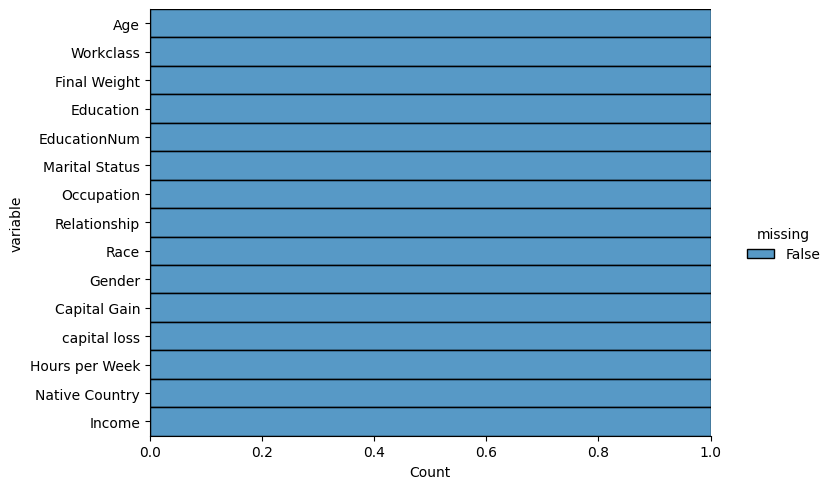

In [5]:
dp.filter_missing(dataset)

There are no missing values in the dataset, which is a good sign, because you won't need to fill in the missing values.

Clean outliers

In [6]:
from scipy import stats

# Function for outliers detection based on percentiles
def outliers_detection(dataset, col, lower_percentile=2.275, upper_percentile=97.725):
    # Calculate the percentiles
    lower_bound = dataset[col].quantile(lower_percentile / 100)
    upper_bound = dataset[col].quantile(upper_percentile / 100)

    # Filter out the outliers
    outliers = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)]

    return outliers

In [7]:
# cycle to check the number of outliers in each numerical column
for col in num_cols:
    print("\n*** Outliers detection in " + col + " ***")
    lst_outliers = outliers_detection(dataset, col)
    print(f"#samples outlier to distribution = {len(lst_outliers)}")
    print(f"%outliers = {round(100* len(lst_outliers)/len(dataset), 2)} %")


*** Outliers detection in Age ***
#samples outlier to distribution = 1132
%outliers = 3.48 %

*** Outliers detection in Final Weight ***
#samples outlier to distribution = 1482
%outliers = 4.55 %

*** Outliers detection in EducationNum ***
#samples outlier to distribution = 965
%outliers = 2.96 %

*** Outliers detection in Capital Gain ***
#samples outlier to distribution = 727
%outliers = 2.23 %

*** Outliers detection in capital loss ***
#samples outlier to distribution = 737
%outliers = 2.26 %

*** Outliers detection in Hours per Week ***
#samples outlier to distribution = 1234
%outliers = 3.79 %


Reduce the percentage of outliers to the minimum acceptable value, for convenient work with them

In [8]:
def clean_outliers(frame):
    frame.loc[frame["Age"] > 65, "Age"] = 65
    frame.loc[frame["Age"] < 18, "Age"] = 18
    frame.loc[frame["Hours per Week"] > 70, "Hours per Week"] = 70
    frame.loc[frame["Hours per Week"] < 10, "Hours per Week"] = 10
    return frame

Master function to clean data

In [9]:
cat_cols

['Workclass',
 'Education',
 'Marital Status',
 'Occupation',
 'Relationship',
 'Race',
 'Gender',
 'Native Country',
 'Income']

In [10]:
# function to clean dataset
def clean_data(frame, is_test=False):
    # cleaning for outliers values
    frame = clean_outliers(frame)
    # drop all duplicate values
    frame = frame.drop_duplicates()
    # drop non-important columns
    frame = frame.drop(columns=['Race', 'Final Weight'], axis=1)

    return frame

The function removes duplicate data and outliers, as well as columns that are not suitable for analysis

Cleaned dataset

In [11]:
dataset = clean_data(dataset)
dataset.head(10)

,Age,Workclass,Education,EducationNum,Marital Status,Occupation,Relationship,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,5178,0,40,United-States,>50K


Redefine metadata

In [12]:
metadata, num_cols, cat_cols = dp.get_metadata(dataset)

print(f"Metadata ==> total: {len(metadata)} \n", metadata)
print("Numerical features: \n", num_cols)
print("Categorical features: \n", cat_cols)

Metadata ==> total: 13 
 Index(['Age', 'Workclass', 'Education', 'EducationNum', 'Marital Status',
       'Occupation', 'Relationship', 'Gender', 'Capital Gain', 'capital loss',
       'Hours per Week', 'Native Country', 'Income'],
      dtype='object')
Numerical features: 
 ['Age', 'EducationNum', 'Capital Gain', 'capital loss', 'Hours per Week']
Categorical features: 
 ['Workclass', 'Education', 'Marital Status', 'Occupation', 'Relationship', 'Gender', 'Native Country', 'Income']


#### 3. Exploratory Data Analysis

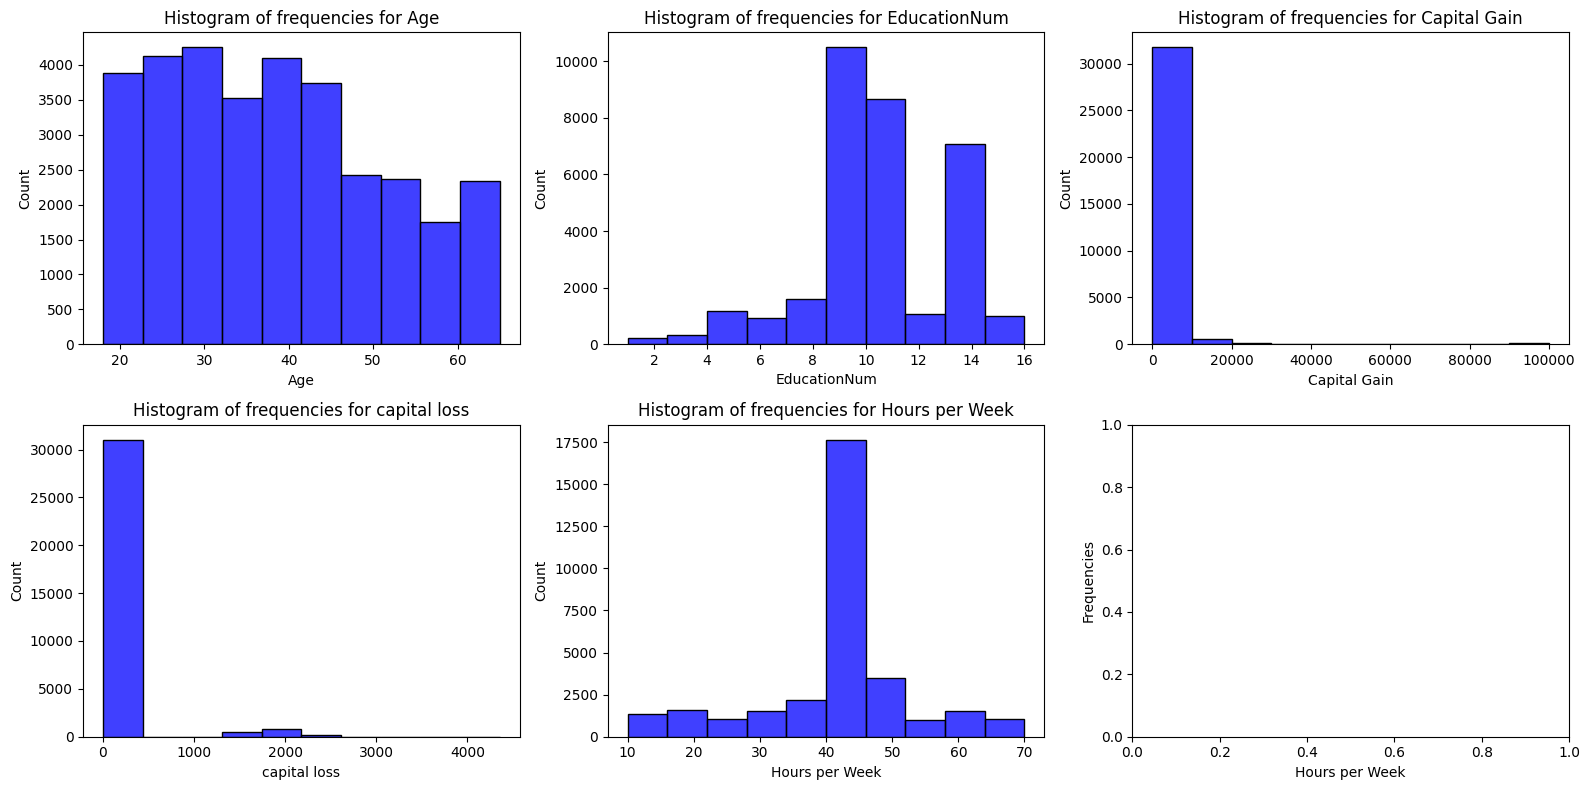

In [13]:
# plot the histogram of frequencies for numerical features
dp.hist_frequencies(dataset, num_cols, bins = 10)

Most people have 10-14 years of education in the region, work about 40 hours a week and that's all depending on age. They also have mostly small losses or capital gains, with very few exceptions.

In [14]:
# check the behavior of categorical features
dp.get_categorical_instances(dataset, cat_cols)


***** Workclass ******
Workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1835
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

***** Education ******
Education
HS-grad         10494
Some-college     7281
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: count, dtype: int64

***** Marital Status ******
Marital Status
Married-civ-spouse       14970
Never-married            10666
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

***** 

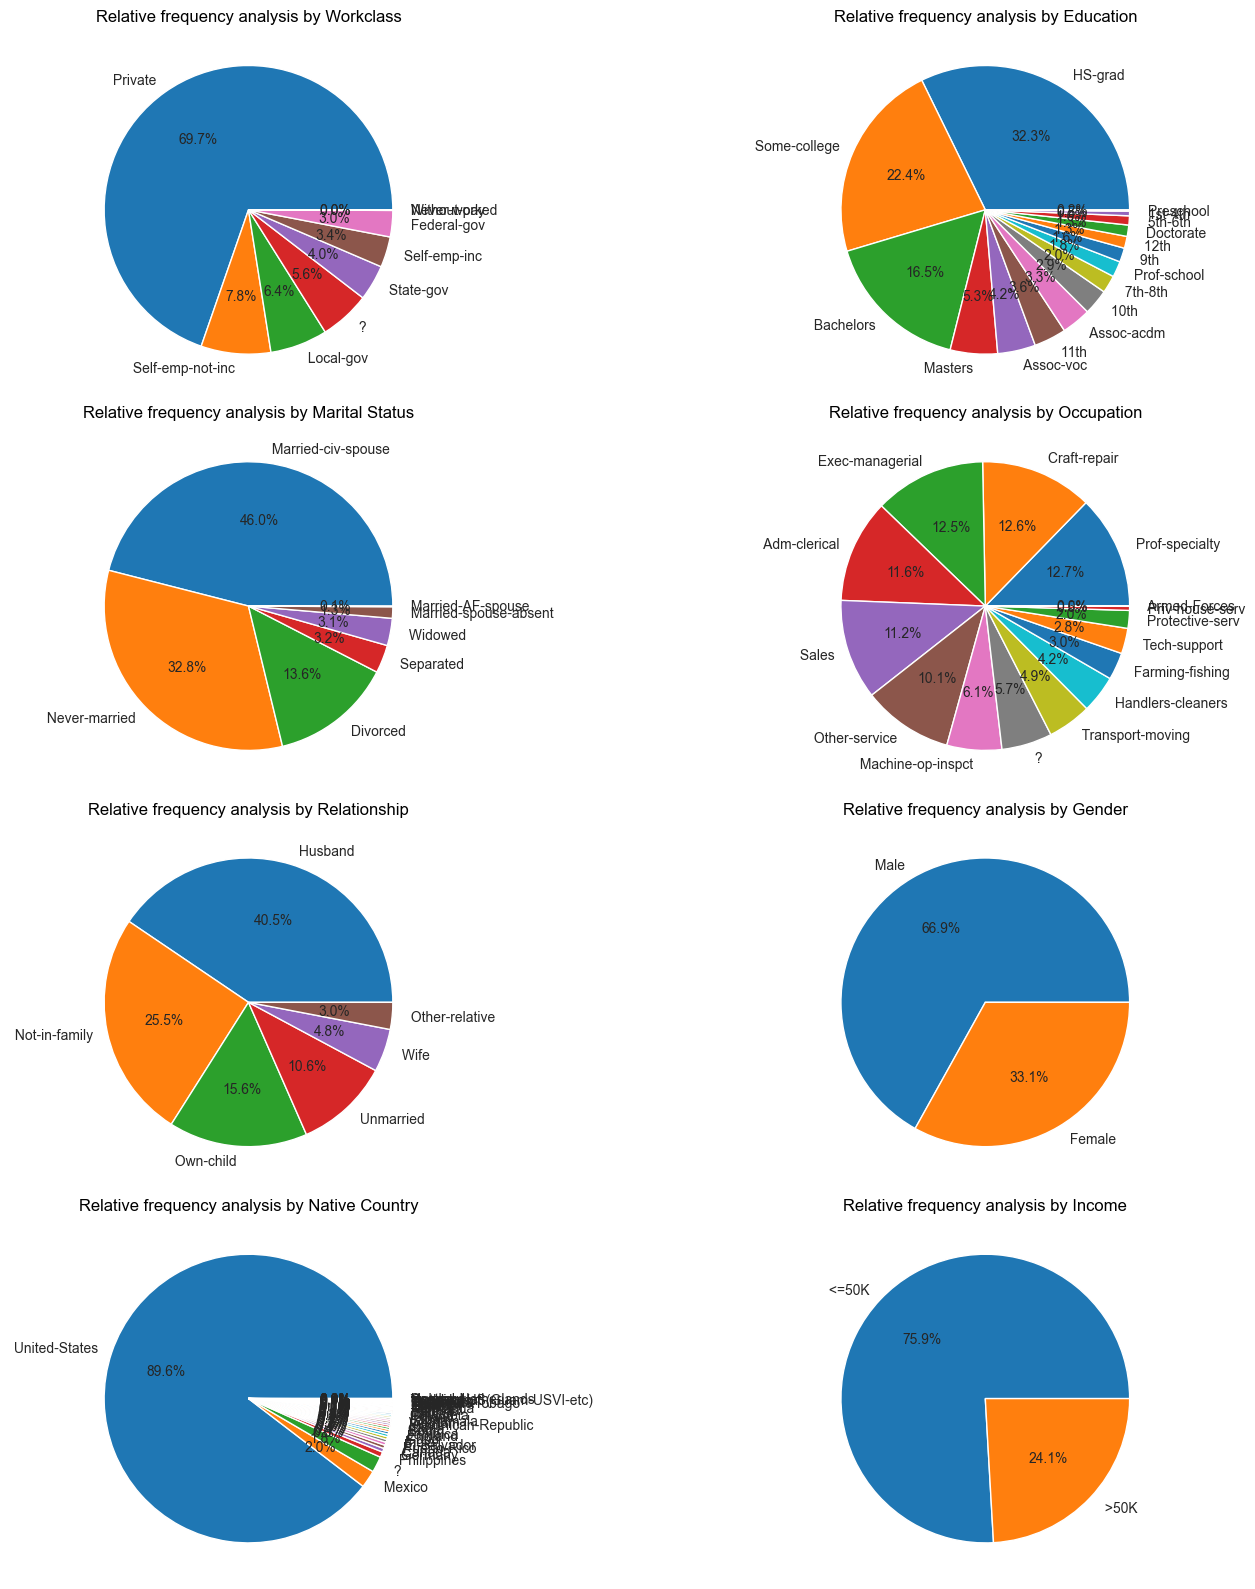

In [15]:
# iteratively pie chart
dp.iter_piechart(dataset, cat_cols)

Most people live in the United States, are married, have graduated from high school or received incomplete higher education, work in various fields and mainly in the private sector and have an income of less than 50 thousand dollars

#### 4. Data preprocessing

In [16]:
# split independent and dependent variables
x = dataset.loc[:, dataset.columns != "Income"]
y = dataset["Income"]

In [17]:
x.head()

,Age,Workclass,Education,EducationNum,Marital Status,Occupation,Relationship,Gender,Capital Gain,capital loss,Hours per Week,Native Country
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba


In [18]:
print("Dimension of features = ", x.shape)
print("Dimension of target = ", y.shape)

Dimension of features =  (32536, 12)
Dimension of target =  (32536,)


Split train and test set

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("X-train dim: ", x_train.shape)
print("Y-train: ", len(y_train))
print("X-test dim: ", x_test.shape)
print("Y-test: ", len(y_test))

X-train dim:  (26028, 12)
Y-train:  26028
X-test dim:  (6508, 12)
Y-test:  6508


Transforming the numerical and categorical features

Numerical features: ['Age', 'EducationNum', 'Capital Gain', 'capital loss', 'Hours per Week']

Categorical features: ['Workclass', 'Education', 'Marital Status', 'Occupation', 'Relationship', 'Gender', 'Native Country', 'Income']

In [20]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder

transformer = make_column_transformer(
    (StandardScaler(), ["Age", "EducationNum", "Hours per Week"]),  
    (RobustScaler(), ["Capital Gain", "capital loss"]),
    (OneHotEncoder(handle_unknown="ignore"), ["Workclass", "Education", "Marital Status", 
                                              "Occupation", "Relationship", "Gender", "Native Country"])    
)

The numerical data that has a normal distribution goes to the Standard Scaler, the rest of the numeric data goes to the RobustScaler. The categorical data goes to OneHotEncoder marked "ignore"

In [21]:
# transformer will learn only from training data
transformer.fit(x_train)

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['Age', 'EducationNum', 'Hours per Week']),
                                ('robustscaler', RobustScaler(),
                                 ['Capital Gain', 'capital loss']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Workclass', 'Education', 'Marital Status',
                                  'Occupation', 'Relationship', 'Gender',
                                  'Native Country'])])

In [22]:
# transformer will transform the train and test data
x_train = transformer.transform(x_train)
x_test = transformer.transform(x_test)

In [23]:
x_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 263630 stored elements and shape (26028, 102)>

In [24]:
y_train

27636     <=50K
18823     <=50K
21940     <=50K
7881      <=50K
4891      <=50K
          ...  
13128      >50K
19657     <=50K
9848      <=50K
10802     <=50K
2732      <=50K
Name: Income, Length: 26028, dtype: object

In [25]:
classes = np.unique(y)
print("Avalilable classes: ", classes)

Avalilable classes:  [' <=50K' ' >50K']


#### 5. Building Models

Benchmark for Models
* KNN
* SVM
* Random Forest
* XGBoost Classifier
* LightGBM Classifier

In [26]:
%reload_ext autoreload
%autoreload 2

KNN Classifier

In [27]:
from scripts.classifiers import KNNModel
import time

# train model
sttrain_knn = time.time()
knn = KNNModel()
knn_model = knn.train(x_train, y_train)

# calculate time
ettrain_knn = time.time()
ttrain_knn = ettrain_knn - sttrain_knn
print(f"Time of training KNN: {ttrain_knn:.3f} seconds")

c:\Users\artem\Downloads\Telegram Desktop\Новая папка\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\artem\Downloads\Telegram Desktop\Новая папка\.venv\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [0.85657748 0.84831724 0.85876734 0.85173657        nan 0.84754893
        nan 0.85096827 0.85657748 0.84831724 0.85876734 0.85173657
        nan 0.84754893        nan 0.85096827 0.85657748 0.84831724
 0.85876734 0.85173657        nan 0.84754893        nan 0.85096827]
  warnings.warn(


Best KNN Parameters: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Time of training KNN: 178.276 seconds


In [28]:
knn_model

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [29]:
# make predictions
print("real values in train: ", y_train[0:10].values)
print("predicted values in train: ", knn_model.predict(x_train[0:10]))
print("real values in test: ", y_test[0:10].values)
print("predicted values in test: ", knn_model.predict(x_test[0:10]))

real values in train:  [' <=50K' ' <=50K' ' <=50K' ' <=50K' ' <=50K' ' <=50K' ' >50K' ' <=50K'
 ' <=50K' ' <=50K']
predicted values in train:  [' <=50K' ' <=50K' ' <=50K' ' <=50K' ' <=50K' ' <=50K' ' >50K' ' <=50K'
 ' <=50K' ' <=50K']
real values in test:  [' <=50K' ' >50K' ' <=50K' ' >50K' ' <=50K' ' >50K' ' <=50K' ' <=50K'
 ' <=50K' ' <=50K']
predicted values in test:  [' <=50K' ' >50K' ' <=50K' ' <=50K' ' <=50K' ' >50K' ' <=50K' ' <=50K'
 ' <=50K' ' <=50K']


There is one mistake in predicted values in test, but otherwise everything is fine

In [30]:
# deploy knn model
from scripts.deploy import DeployClassifier
DeployClassifier(path="models").save_model(filename="knn_v1.pkl", model=knn_model)

In [31]:
# evaluate knn model
from scripts.evaluator import EvalClassifier
rec_knn = DeployClassifier(path = "models").load_model(filename="knn_v1.pkl")
eval_knn = EvalClassifier(model = rec_knn)

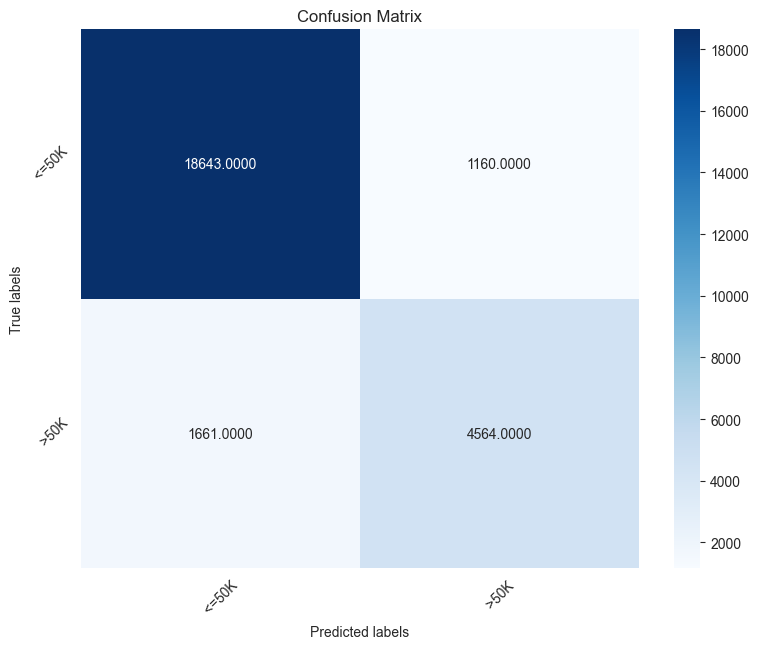

In [32]:
# get confusion matrix in training
y_pred = rec_knn.predict(x_train)
cmknn_train = eval_knn.get_confusion_matrix(y_train.values, y_pred, classes)
eval_knn.plot_confusion_matrix(cmknn_train, classes)

The model correctly predicted 94% of people with an income of less than 50K, with people with an income of more than 50K, the situation is a little worse - around 73%. This may be due to insufficient data for training or the lack of certain dependencies of other data and data on a person's high income level

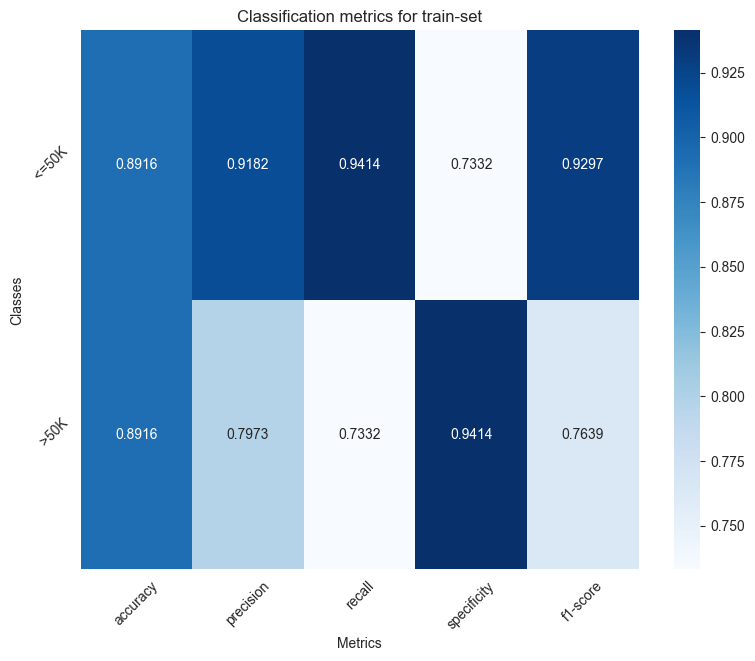

In [33]:
metrics_train_knn = eval_knn.calculate_metrics_by_class(cmknn_train, classes)
eval_knn.plot_metrics_by_class(metrics_train_knn, "Classification metrics for train-set")

Against the background of acceptable characteristics, in contrast, it can be noticed that the model has little difficulty identifying true positive cases for people with an income of more than 50K and identifying true negative cases for people with an income of less than 50K

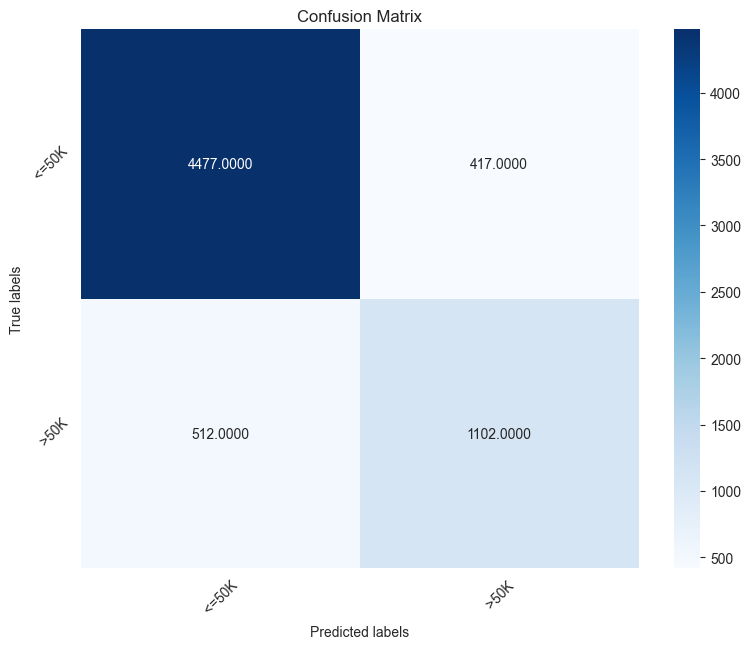

In [34]:
# get confusion matrix in testing
y_pred = rec_knn.predict(x_test)
cmknn_test = eval_knn.get_confusion_matrix(y_test, y_pred, classes)
eval_knn.plot_confusion_matrix(cmknn_test, classes)

As expected, the percentage of correctly guessed values decreased slightly for the test data. for less than 50K it is 90%, for more than 50K it is 68%

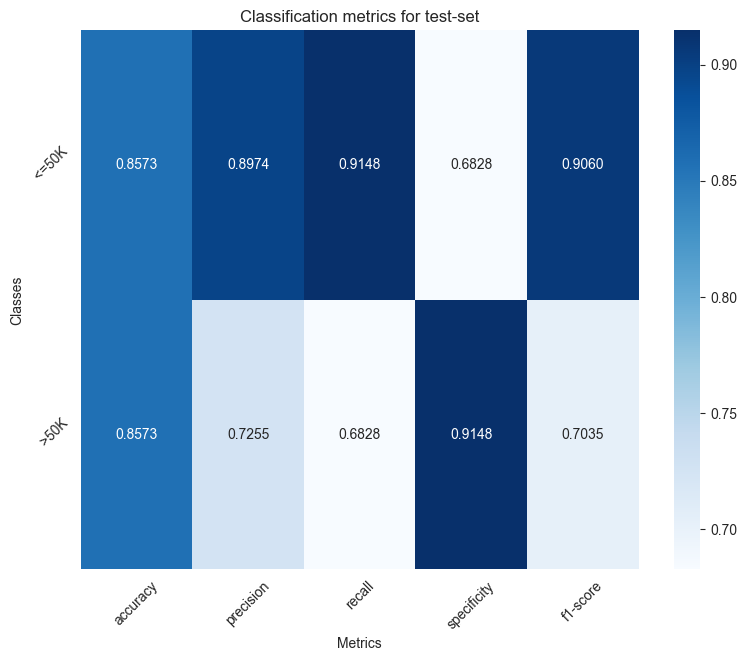

In [35]:
metrics_test_knn = eval_knn.calculate_metrics_by_class(cmknn_test, classes)
eval_knn.plot_metrics_by_class(metrics_test_knn, "Classification metrics for test-set")

The situation is almost the same as with the training data

In [36]:
# calculate the metrics for whole test set
eval_knn.calculate_metrics_xall(cmknn_test, metrics_test_knn)

,accuracy,precision,recall,specificity,f1-score
Mean-metrics,0.857253,0.811426,0.798785,0.798785,0.80474


The model is not completely stable, there is a gap between accuracy and other characteristics, the reasons for this were listed above

SVM Classifier

In [62]:
from scripts.classifiers import SVMModel
import time
from sklearn.svm import LinearSVC

# train model
sttrain_svm = time.time()
svm = LinearSVC()
svm_model = svm.fit(x_train, y_train)

# calculate time
ettrain_svm = time.time()
ttrain_svm = ettrain_svm - sttrain_svm
print(f"Time of training SVM: {ttrain_svm:.3f} seconds")

Time of training SVM: 0.063 seconds


Due to the very long training of the SVM model (which could not be trained after more than an hour), severe overheating of the device and the departure of the program due to heavy loads, it was decided to replace this model with LinearSVC. LinearSVC is faster and more optimized than SVM model

In [63]:
svm_model

LinearSVC()

In [64]:
# make predictions
print("real values in train: ", y_train[0:10].values)
print("predicted values in train: ", svm_model.predict(x_train[0:10]))
print("real values in test: ", y_test[0:10].values)
print("predicted values in test: ", svm_model.predict(x_test[0:10]))

real values in train:  [' <=50K' ' <=50K' ' <=50K' ' <=50K' ' <=50K' ' <=50K' ' >50K' ' <=50K'
 ' <=50K' ' <=50K']
predicted values in train:  [' <=50K' ' <=50K' ' <=50K' ' <=50K' ' <=50K' ' <=50K' ' >50K' ' <=50K'
 ' <=50K' ' <=50K']
real values in test:  [' <=50K' ' >50K' ' <=50K' ' >50K' ' <=50K' ' >50K' ' <=50K' ' <=50K'
 ' <=50K' ' <=50K']
predicted values in test:  [' <=50K' ' >50K' ' <=50K' ' <=50K' ' <=50K' ' >50K' ' <=50K' ' <=50K'
 ' <=50K' ' <=50K']


In [65]:
# deploy svm model
from scripts.deploy import DeployClassifier
DeployClassifier(path="models").save_model(filename="svm_v1.pkl", model=svm_model)

In [66]:
# evaluate svm model
from scripts.evaluator import EvalClassifier
rec_svm = DeployClassifier(path = "models").load_model(filename="svm_v1.pkl")
eval_svm = EvalClassifier(model = rec_svm)

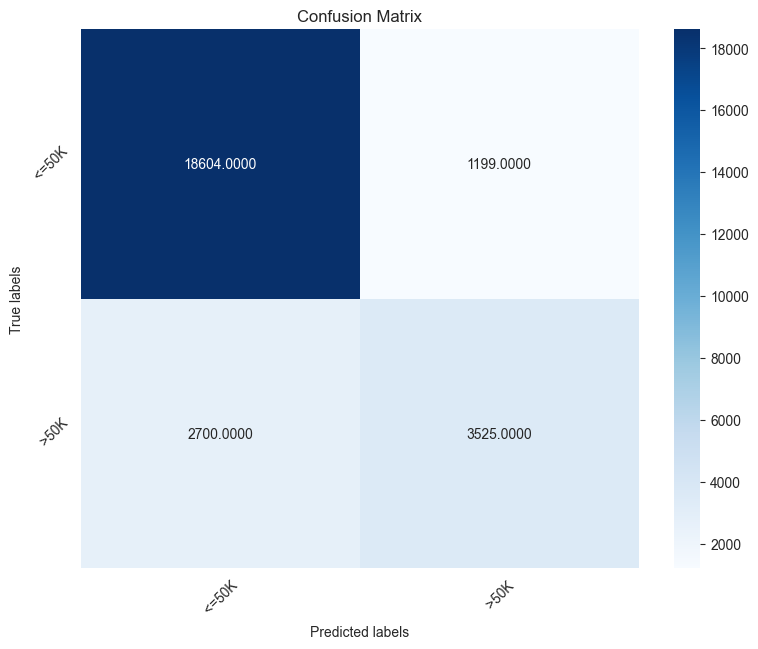

In [67]:
# get confusion matrix in training
y_pred = rec_svm.predict(x_train)
cmsvm_train = eval_svm.get_confusion_matrix(y_train.values, y_pred, classes)
eval_svm.plot_confusion_matrix(cmsvm_train, classes)

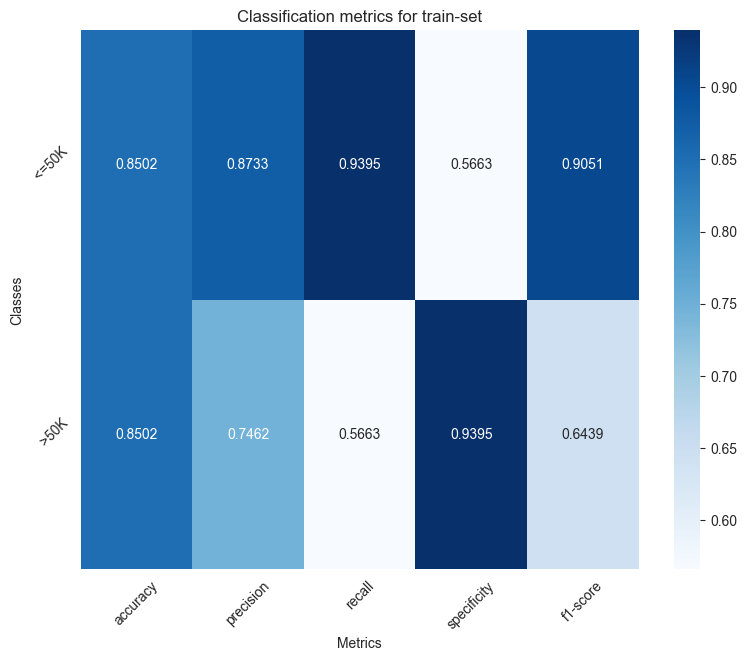

In [68]:
metrics_train_svm = eval_svm.calculate_metrics_by_class(cmsvm_train, classes)
eval_svm.plot_metrics_by_class(metrics_train_svm, "Classification metrics for train-set")

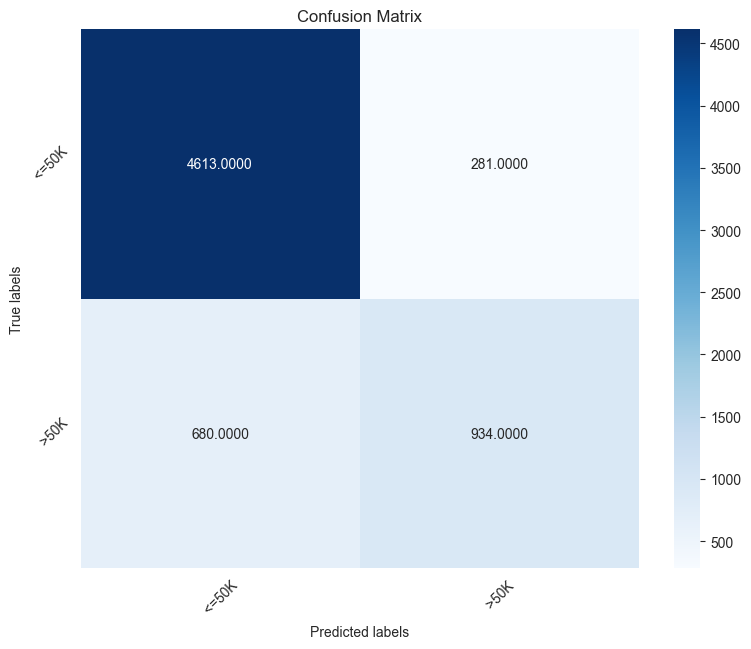

In [71]:
# get confusion matrix in testing
y_pred = rec_svm.predict(x_test)
cmsvm_test = eval_svm.get_confusion_matrix(y_test, y_pred,classes)
eval_svm.plot_confusion_matrix(cmsvm_test, classes)

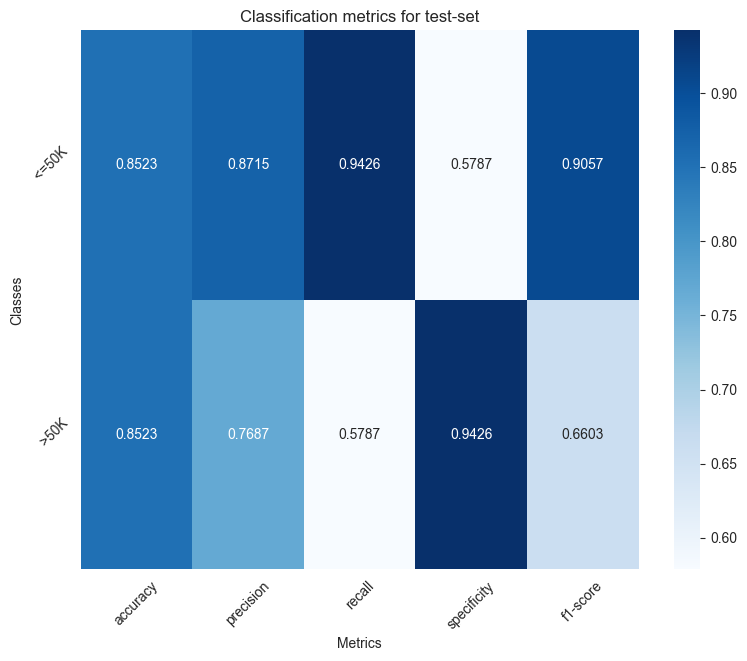

In [72]:
metrics_test_svm = eval_svm.calculate_metrics_by_class(cmsvm_test, classes)
eval_svm.plot_metrics_by_class(metrics_test_svm, "Classification metrics for test-set")

In [73]:
# calculate the metrics for whole test set
eval_svm.calculate_metrics_xall(cmsvm_test, metrics_test_svm)

,accuracy,precision,recall,specificity,f1-score
Mean-metrics,0.852336,0.820126,0.760635,0.760635,0.782984


Although this model is fast-training, it affected the accuracy of the definition

Random Forest Classifier

In [46]:
from scripts.classifiers import RandomForestModel
import time

# train model
sttrain_rf = time.time()
rf = RandomForestModel()
rf_model = rf.train(x_train, y_train)

# calculate time
ettrain_rf = time.time()
ttrain_rf = ettrain_rf - sttrain_rf
print(f"Time of training Random Forest: {ttrain_rf:.3f} seconds")

c:\Users\artem\Downloads\Telegram Desktop\Новая папка\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Random Forest Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 40}
Time of training Random Forest: 88.166 seconds


In [47]:
rf_model

RandomForestClassifier(max_depth=30, min_samples_split=20, n_estimators=40)

In [48]:
# make predictions
print("real values in train: ", y_train[0:10].values)
print("predicted values in train: ", rf_model.predict(x_train[0:10]))
print("real values in test: ", y_test[0:10].values)
print("predicted values in test: ", rf_model.predict(x_test[0:10]))

real values in train:  [' <=50K' ' <=50K' ' <=50K' ' <=50K' ' <=50K' ' <=50K' ' >50K' ' <=50K'
 ' <=50K' ' <=50K']
predicted values in train:  [' <=50K' ' <=50K' ' <=50K' ' <=50K' ' <=50K' ' <=50K' ' >50K' ' <=50K'
 ' <=50K' ' <=50K']
real values in test:  [' <=50K' ' >50K' ' <=50K' ' >50K' ' <=50K' ' >50K' ' <=50K' ' <=50K'
 ' <=50K' ' <=50K']
predicted values in test:  [' <=50K' ' >50K' ' <=50K' ' <=50K' ' <=50K' ' >50K' ' <=50K' ' <=50K'
 ' <=50K' ' <=50K']


In [49]:
# deploy rf model
from scripts.deploy import DeployClassifier
DeployClassifier(path="models").save_model(filename="rf_v1.pkl", model=rf_model)

In [50]:
# evaluate rf model
from scripts.evaluator import EvalClassifier
rec_rf = DeployClassifier(path = "models").load_model(filename="rf_v1.pkl")
eval_rf = EvalClassifier(model = rec_rf)

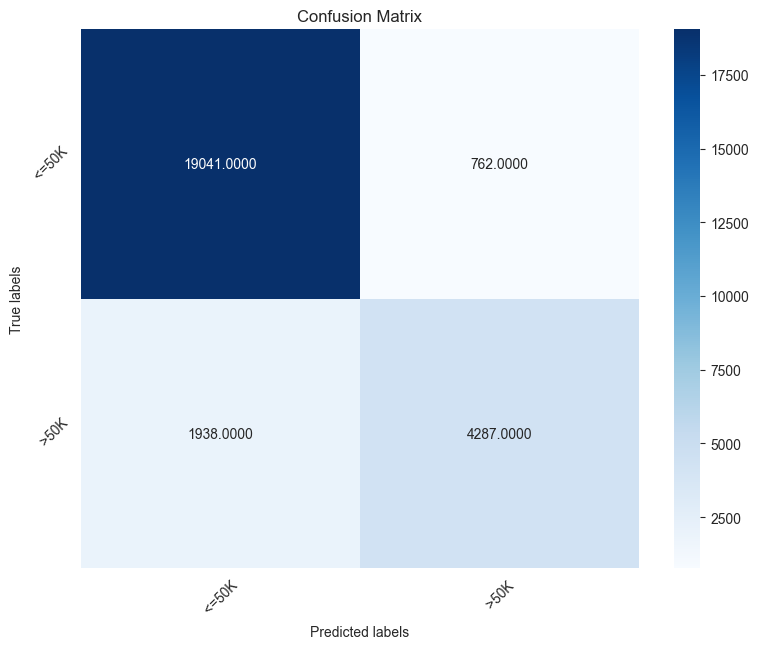

In [51]:
# get confusion matrix in training
y_pred = rec_rf.predict(x_train)
cmrf_train = eval_rf.get_confusion_matrix(y_train.values, y_pred, classes)
eval_rf.plot_confusion_matrix(cmrf_train, classes)

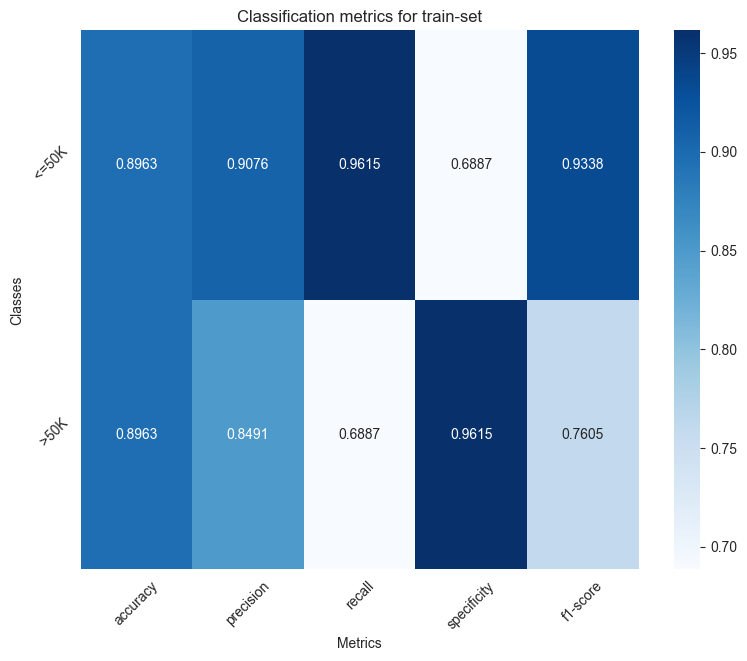

In [52]:
metrics_train_rf = eval_knn.calculate_metrics_by_class(cmrf_train, classes)
eval_rf.plot_metrics_by_class(metrics_train_rf, "Classification metrics for train-set")

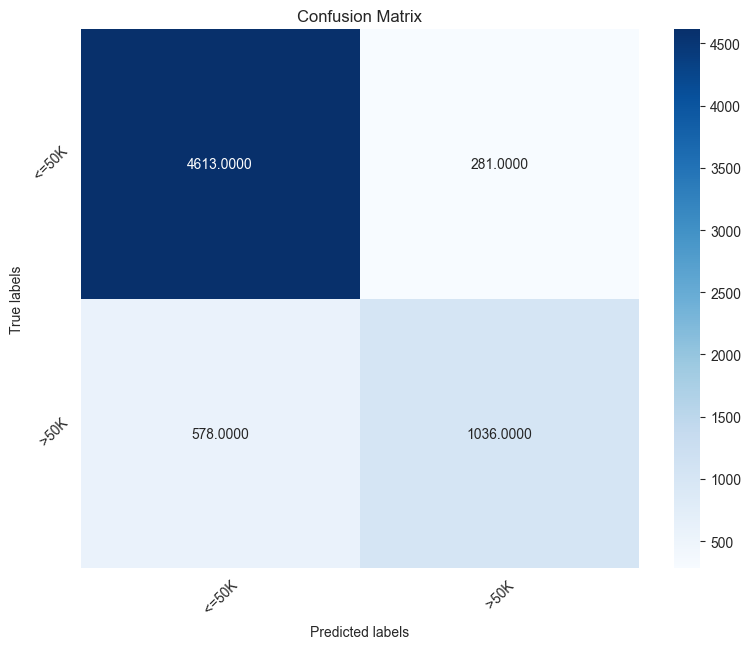

In [55]:
# get confusion matrix in testing
y_pred = rec_rf.predict(x_test)
cmrf_test = eval_rf.get_confusion_matrix(y_test, y_pred,classes)
eval_rf.plot_confusion_matrix(cmrf_test, classes)

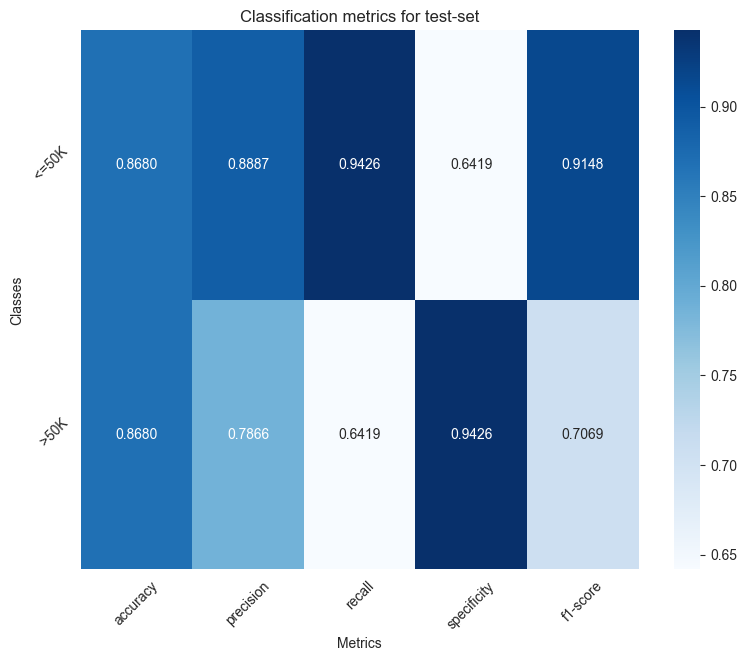

In [56]:
metrics_test_rf = eval_rf.calculate_metrics_by_class(cmrf_test, classes)
eval_rf.plot_metrics_by_class(metrics_test_rf, "Classification metrics for test-set")

In [57]:
# calculate the metrics for whole test set
eval_rf.calculate_metrics_xall(cmrf_test, metrics_test_rf)

,accuracy,precision,recall,specificity,f1-score
Mean-metrics,0.868009,0.837645,0.792233,0.792233,0.810875


The situation is very similar to the KNN model

#### Consclusion

KNN:----------Time - 178.276 seconds

--------------- accuracy---precision-----recall-----specificity---f1-score

---------------0.857253---0.811426---0.798785---0.798785---0.80474

//////////////////////////////////////////////////////////////////////////////


LinearSVC:----Time - 0.063 seconds

--------------- accuracy---precision-----recall-----specificity---f1-score

---------------0.852336---0.820126---0.760635---0.760635---0.782984

//////////////////////////////////////////////////////////////////////////////

RF:-----------Time - 88.166 seconds

--------------- accuracy---precision-----recall-----specificity---f1-score

---------------0.868009---0.837645---0.792233---0.792233---0.810875


The KNN and RF models showed similar very similar results and their training did not take too long (but training the RF model took half the time, which can be critical when working with larger data), so it is recommended to use them. Although LinearSVC trained the fastest, it affected the accuracy of the definition. The SVM model could not be implemented due to technical limitations of working devices